In [1]:
!pip install -Uqq fastbook

In [2]:
from fastai.tabular.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [39]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
set_seed(42)

In [5]:
df.Cabin.str[0].map(dict(C = 'ABC'))

0      NaN
1      ABC
2      NaN
3      ABC
4      NaN
      ... 
886    NaN
887    NaN
888    NaN
889    ABC
890    NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [7]:
len(df)

891

In [8]:
df.groupby('Ticket')['Ticket'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket, Length: 891, dtype: int64

In [9]:
df2 = pd.DataFrame({
    "Date": [
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05",
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05"],
    "Data": [5, 8, 6, 1, 50, 100, 60, 120],
})

In [10]:
df2

,Date,Data
0,2015-05-08,5
1,2015-05-07,8
2,2015-05-06,6
3,2015-05-05,1
4,2015-05-08,50
5,2015-05-07,100
6,2015-05-06,60
7,2015-05-05,120


In [17]:
list(df2.groupby('Date')['Data'])

[('2015-05-05',
  3      1
  7    120
  Name: Data, dtype: int64),
 ('2015-05-06',
  2     6
  6    60
  Name: Data, dtype: int64),
 ('2015-05-07',
  1      8
  5    100
  Name: Data, dtype: int64),
 ('2015-05-08',
  0     5
  4    50
  Name: Data, dtype: int64)]

In [19]:
df2.groupby('Date')['Data'].transform('count')

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
Name: Data, dtype: int64

In [46]:
df.Name.str.split(', ', expand = True)[1].str.split('.', expand = True)[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [49]:
df.Cabin.str[0].map(dict(A = 'ABC', B = 'ABC', C = 'ABC', D = 'DE', E = 'DE', F = 'FG', G = 'FG'))

0      NaN
1      ABC
2      NaN
3      ABC
4      NaN
      ... 
886    NaN
887    ABC
888    NaN
889    ABC
890    NaN
Name: Cabin, Length: 891, dtype: object

In [31]:
df3 = pd.DataFrame({
    'any': ['one', 'two', 'three', 'four', 'five']
})
df3

,any
0,one
1,two
2,three
3,four
4,five


In [32]:
df3['any'].map(dict(one = '1', two = '2', three = '3', four = '4', five = '5'))

0    1
1    2
2    3
3    4
4    5
Name: any, dtype: object

In [42]:
def add_features(df):
    df['LogFare'] = np.log1p(df.Fare)
    df['Deck'] = df.Cabin.str[0].map(dict(A = 'ABC', B = 'ABC', C = 'ABC', D = 'DE', E = 'DE', F = 'FG', G = 'FG'))
    df['Family'] = df.SibSp + df.Parch
    df['Alone'] = df.Family == 0
    df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['Title'] = df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    df['Title'] = df.Title.map(dict(Mr="Mr",Miss="Miss",Mrs="Mrs",Master="Master"))

In [43]:
add_features(df)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,NaN,1,False,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,ABC,1,False,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,NaN,0,True,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834,ABC,1,False,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765,NaN,0,True,1,Mr


In [47]:
splits = RandomSplitter(seed = 42)(df)
splits

((#713) [788,525,821,253,374,98,215,313,281,305...],
 (#178) [303,778,531,385,134,476,691,443,386,128...])

In [48]:
dls = TabularPandas(
    df,
    procs = [Categorify, FillMissing, Normalize],
    cat_names = ['Pclass', 'Sex', 'Embarked', 'Deck', 'Title'],
    cont_names = ['Age', 'SibSp', 'Parch', 'LogFare', 'Family', 'Alone', 'TicketFreq'],
    y_names = 'Survived',
    splits = splits,
    y_block = CategoryBlock()
).dataloaders(path = '.')

In [49]:
dls.show_batch()

,Pclass,Sex,Embarked,Deck,Title,Age_na,Age,SibSp,Parch,LogFare,Family,Alone,TicketFreq,Survived
0,3,female,Q,#na#,Miss,False,15.000000,1.689237e-09,-9.897945e-09,2.200464,-1.856774e-08,1.000000e+00,1.0,1
1,3,male,S,#na#,Mr,False,43.999999,1.689237e-09,-9.897945e-09,2.202765,-1.856774e-08,1.000000e+00,1.0,0
2,1,male,S,ABC,Mr,False,61.000001,1.689237e-09,-9.897945e-09,3.540959,-1.856774e-08,1.000000e+00,1.0,0
3,3,male,S,#na#,Mr,True,28.000000,8.000000e+00,2.000000e+00,4.256322,1.000000e+01,2.458140e-08,7.0,0
4,3,male,S,#na#,Mr,False,27.000000,1.689237e-09,-9.897945e-09,2.185579,-1.856774e-08,1.000000e+00,1.0,0
5,1,male,S,DE,Mr,False,51.000000,1.689237e-09,-9.897945e-09,3.316003,-1.856774e-08,1.000000e+00,1.0,1
6,2,female,S,#na#,Miss,False,34.000000,1.689237e-09,-9.897945e-09,2.639057,-1.856774e-08,1.000000e+00,1.0,1
7,3,male,S,#na#,Mr,False,20.000000,1.689237e-09,-9.897945e-09,2.383778,-1.856774e-08,1.000000e+00,2.0,0
8,1,male,S,ABC,#na#,False,69.999999,1.000000e+00,1.000000e+00,4.276666,2.000000e+00,2.458140e-08,2.0,0
9,3,female,Q,#na#,Mrs,False,32.000000,1.000000e+00,1.000000e+00,2.803360,2.000000e+00,2.458140e-08,2.0,0


In [50]:
learn = tabular_learner(dls, metrics = accuracy, layers = [10, 10])

SuggestedLRs(slide=0.03981071710586548, valley=0.005248074419796467)

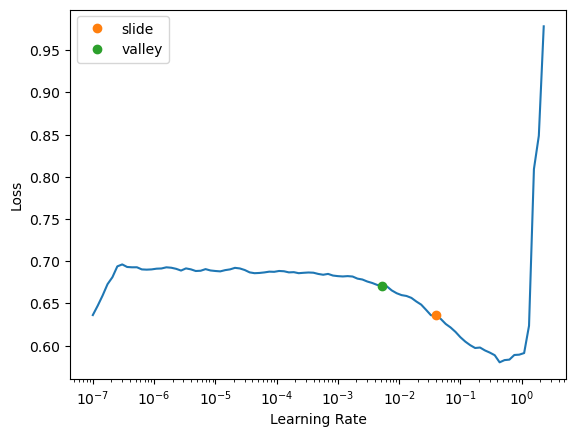

In [51]:
learn.lr_find(suggest_funcs = (slide, valley))

In [52]:
learn.fit(16, lr = 0.02)

epoch,train_loss,valid_loss,accuracy,time
0,0.561436,0.571135,0.696629,00:00
1,0.488430,0.457974,0.786517,00:00
2,0.452446,0.435010,0.825843,00:00
3,0.436949,0.422607,0.831461,00:00
4,0.422718,0.419413,0.814607,00:00
5,0.411891,0.409359,0.837079,00:00
6,0.404606,0.415111,0.797753,00:00
7,0.399608,0.412720,0.820225,00:00
8,0.395503,0.430638,0.820225,00:00
9,0.392255,0.405387,0.837079,00:00


In [53]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
test_df.Fare.fillna(0, inplace = True)

In [56]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [57]:
add_features(test_df)

In [58]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2.178064,NaN,0,True,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.079442,NaN,1,False,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2.369075,NaN,0,True,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2.268252,NaN,0,True,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.586824,NaN,2,False,1,Mrs


In [59]:
test_dl = learn.dls.test_dl(test_df)

In [63]:
list(test_dl)[0]

(tensor([[3, 2, 2, 0, 3, 1],
         [3, 1, 3, 0, 4, 1],
         [2, 2, 2, 0, 3, 1],
         [3, 2, 3, 0, 3, 1],
         [3, 1, 3, 0, 4, 1],
         [3, 2, 3, 0, 3, 1],
         [3, 1, 2, 0, 2, 1],
         [2, 2, 3, 0, 3, 1],
         [3, 1, 1, 0, 4, 1],
         [3, 2, 3, 0, 3, 1],
         [3, 2, 3, 0, 3, 2],
         [1, 2, 3, 0, 3, 1],
         [1, 1, 3, 1, 4, 1],
         [2, 2, 3, 0, 3, 1],
         [1, 1, 3, 2, 4, 1],
         [2, 1, 1, 0, 4, 1],
         [2, 2, 2, 0, 3, 1],
         [3, 2, 1, 0, 3, 1],
         [3, 1, 3, 0, 2, 1],
         [3, 1, 1, 0, 4, 1],
         [1, 2, 1, 0, 3, 1],
         [3, 2, 3, 0, 1, 1],
         [1, 1, 3, 0, 4, 2],
         [1, 2, 1, 0, 3, 1],
         [1, 1, 1, 1, 4, 1],
         [3, 2, 3, 0, 3, 1],
         [1, 1, 1, 1, 2, 1],
         [3, 2, 1, 0, 3, 1],
         [1, 2, 3, 1, 3, 1],
         [3, 2, 1, 0, 3, 2],
         [2, 2, 3, 0, 3, 1],
         [2, 2, 3, 0, 3, 1],
         [3, 1, 3, 0, 4, 1],
         [3, 1, 3, 0, 4, 2],
         [1, 2

In [67]:
preds, _ = learn.get_preds(dl = test_dl)

In [69]:
preds.shape

torch.Size([418, 2])

In [74]:
test_df['Survived'] = (preds[:, 1] > 0.5).int()

In [75]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Family,Alone,TicketFreq,Title,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2.178064,NaN,0,True,1,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.079442,NaN,1,False,1,Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2.369075,NaN,0,True,1,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2.268252,NaN,0,True,1,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.586824,NaN,2,False,1,Mrs,1


In [81]:
def ensemble():
    learn = tabular_learner(dls, metrics = accuracy, layers = [10, 10])
    with learn.no_bar(), learn.no_logging(): learn.fit(16, lr = 0.02)
    return learn.get_preds(dl = test_dl)[0]

In [82]:
learns = [ensemble() for _ in range(5)]

In [85]:
len(learns)

5

In [94]:
ens_preds = torch.stack(learns).mean(0)

In [95]:
ens_preds

tensor([[0.9105, 0.0895],
        [0.6585, 0.3415],
        [0.9578, 0.0422],
        [0.8932, 0.1068],
        [0.2794, 0.7206],
        [0.8692, 0.1308],
        [0.4230, 0.5770],
        [0.9378, 0.0622],
        [0.2170, 0.7830],
        [0.8880, 0.1120],
        [0.9174, 0.0826],
        [0.8898, 0.1102],
        [0.0304, 0.9696],
        [0.9639, 0.0361],
        [0.0221, 0.9779],
        [0.0274, 0.9726],
        [0.9023, 0.0977],
        [0.7884, 0.2116],
        [0.6886, 0.3114],
        [0.4140, 0.5860],
        [0.8913, 0.1087],
        [0.1155, 0.8845],
        [0.0588, 0.9412],
        [0.8102, 0.1898],
        [0.1629, 0.8371],
        [0.9542, 0.0458],
        [0.0273, 0.9727],
        [0.8007, 0.1993],
        [0.7808, 0.2192],
        [0.9086, 0.0914],
        [0.9483, 0.0517],
        [0.9345, 0.0655],
        [0.4683, 0.5317],
        [0.5063, 0.4937],
        [0.5460, 0.4540],
        [0.7610, 0.2390],
        [0.7155, 0.2845],
        [0.5010, 0.4990],
        [0.8